# Contents of This Note Book
- Random Data Generation for SINE 
- Single Layer Nerual Network Creation
- Model Errors Visualization and Understanding 
- Model Saving and Loading
- Comparison between Predictions and Real Data
- Improving Our Model

Author :
 ❤ **Muhammad Luqman** ❤

## Data Generation and Visualization

### Importing Libraries

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Random Data Generation
**Data Creation**
- 1000 Samples along X-axis 
- Randomly Unfiform with 0 - 2(pi) Range
- Shuffling Them so order is removed
- Generating a Sin wave with values along X-axis
- Plotting the Data on X-Y Plane

In [2]:
samples = 1000
data_x_values = np.random.uniform(0,2*math.pi,samples).astype(np.float32)
data_y_values = np.sin(data_x_values).astype(np.float32)

### Visualizing Our Data

Text(0.5, 0, 'Number of Sample')

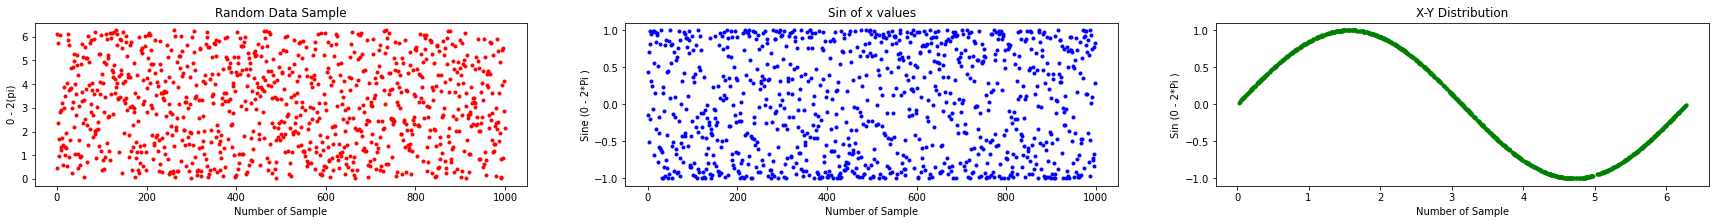

In [3]:
plotter = plt.figure(figsize=(30,3))

plot_x = plotter.add_subplot(131)
plot_y = plotter.add_subplot(132)
plot_xy = plotter.add_subplot(133)
plot_x.plot(data_x_values,'r.')
plot_y.plot(data_y_values,'b.')
plot_xy.plot(data_x_values,data_y_values,'g.')
plot_x.set_title("Random Data Sample");plot_x.set_ylabel('0 - 2(pi)');plot_x.set_xlabel('Number of Sample')
plot_y.set_title("Sin of x values");plot_y.set_ylabel('Sine (0 - 2*Pi )');plot_y.set_xlabel('Number of Sample')
plot_xy.set_title("X-Y Distribution");plot_xy.set_ylabel('Sin (0 - 2*Pi )');plot_xy.set_xlabel('Number of Sample')

## Data Splitting and Noise Addition

### Noise Addition to have Generalize Data

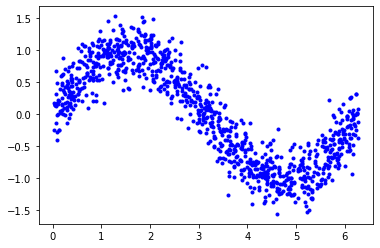

In [4]:
data_y_values = data_y_values + 0.25 * np.random.randn(*data_y_values.shape)

plt.plot(data_x_values,data_y_values,'b.')

### Data Split for **Training** **Testing** and **Validating**
- Variables values 
- Total Samples = 1000 
- *Training* = 600 *Testing* = 200 *Validating* = 200 



In [5]:
training_data_split = int(0.6*samples)
test_val_data_split = int(0.2 * samples + training_data_split )
# print(training_data_split , test_val_data_split)

x_train,x_test , x_validate = np.split(data_x_values , [training_data_split,test_val_data_split])
y_train,y_test , y_validate = np.split(data_y_values , [training_data_split,test_val_data_split])

print(x_train.shape,x_test.shape , x_validate.shape)

(600,) (200,) (200,)


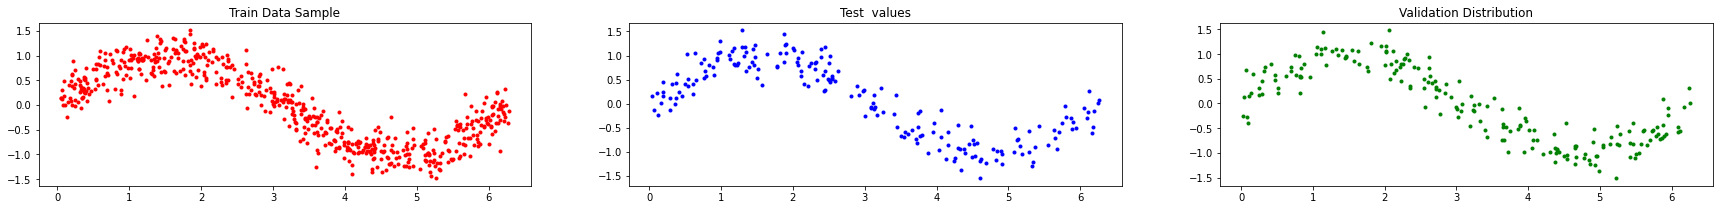

In [6]:
plotter_splitter = plt.figure(figsize=(30,3))

plot_x = plotter_splitter.add_subplot(131)
plot_y = plotter_splitter.add_subplot(132)
plot_xy = plotter_splitter.add_subplot(133)
plot_x.plot(x_train , y_train,'r.')
plot_y.plot(x_test,   y_test,'b.')
plot_xy.plot(x_validate,y_validate,'g.')
plot_x.set_title("Train Data Sample");#plot_x.set_ylabel('0 - 2(pi)');plot_x.set_xlabel('Number of Sample')
plot_y.set_title("Test  values");#plot_y.set_ylabel('Sine (0 - 2*Pi )');plot_y.set_xlabel('Number of Sample')
plot_xy.set_title("Validation Distribution");#plot_xy.set_ylabel('Sin (0 - 2*Pi )');plot_xy.set_xlabel('Number of Sample')

## Basic Model Creation and Training
Creating Single Layer *Nerual Network*
- **Integeration**
  - 8 inputs
  - 1 output
- **Activation**
  - Relu ( Rectified Linear Unit )
- **Optimizer**
  - Adam
- **Loss Calculations**
  - Mean Squared Error 
  - Mean Absolute Error


In [7]:
sine_model = tf.keras.Sequential()
sine_model.add(keras.layers.Dense(8,'relu',input_shape=(1,)))
sine_model.add(keras.layers.Dense(1))

sine_model.compile(optimizer='adam' , loss='mse',metrics=['mae'])
sine_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 16        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Training the Model
- Epochs = 500
- Batch Size = 32



In [8]:
sine_model_1_history = sine_model.fit(x_train,y_train,32,500,validation_data=(x_validate,y_validate))

Epoch 1/500
19/19 [==============================] - 1s 12ms/step - loss: 6.1921 - mae: 1.9648 - val_loss: 5.5715 - val_mae: 1.8683
Epoch 2/500
19/19 [==============================] - 0s 3ms/step - loss: 5.0991 - mae: 1.7925 - val_loss: 4.5892 - val_mae: 1.7031
Epoch 3/500
19/19 [==============================] - 0s 3ms/step - loss: 4.2057 - mae: 1.6405 - val_loss: 3.7797 - val_mae: 1.5545
Epoch 4/500
19/19 [==============================] - 0s 4ms/step - loss: 3.4698 - mae: 1.5096 - val_loss: 3.1209 - val_mae: 1.4292
Epoch 5/500
19/19 [==============================] - 0s 3ms/step - loss: 2.8564 - mae: 1.3886 - val_loss: 2.5894 - val_mae: 1.3214
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 2.3726 - mae: 1.2848 - val_loss: 2.1363 - val_mae: 1.2210
Epoch 7/500
19/19 [==============================] - 0s 3ms/step - loss: 1.9642 - mae: 1.1866 - val_loss: 1.7792 - val_mae: 1.1326
Epoch 8/500
19/19 [==============================] - 0s 3ms/step - loss: 1.6428 - 

## Model Testing through Predictions

In [ ]:
predictions = sine_model.predict(x_test)


Text(0, 0.5, 'Sin Function')

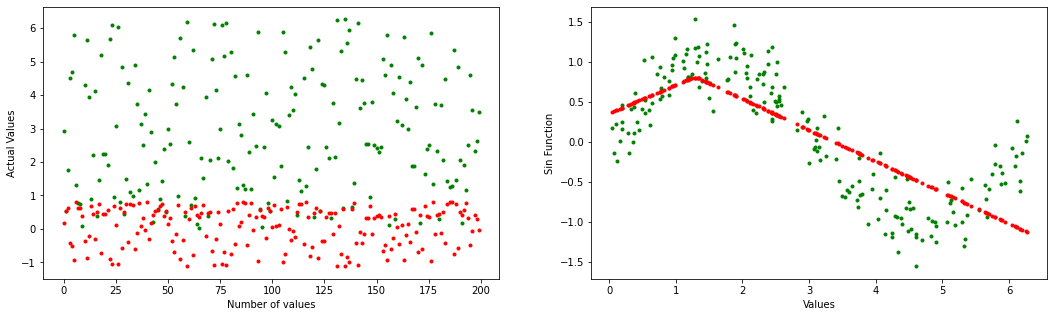

In [27]:

predictions_plotter = plt.figure(figsize=(18,5)) 
variable_values     = predictions_plotter.add_subplot(121)
prediction_results  = predictions_plotter.add_subplot(122)

variable_values.plot(x_test,'g.')
variable_values.plot(predictions,'r.')

variable_values.set_xlabel("Number of values")
variable_values.set_ylabel('Actual Values')


prediction_results.plot(x_test,y_test,'g.')
prediction_results.plot(x_test,predictions,'r.')

prediction_results.set_xlabel("Values")
prediction_results.set_ylabel('Sin Function')

## Interpreting Model Training Errors 
- LOSS (**Mean Squared Error**)
  - Distance between prediction and actual values in training and validation sets
- MAE (**Mean Absolute Error**)
  - magnitude of difference between the prediction of an observation and the true value of that observation.

In [52]:
## What history dictionary contains
print(sine_model_1_history.history.keys() )

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


Text(0.5, 1.0, 'Mean Absolute Error')

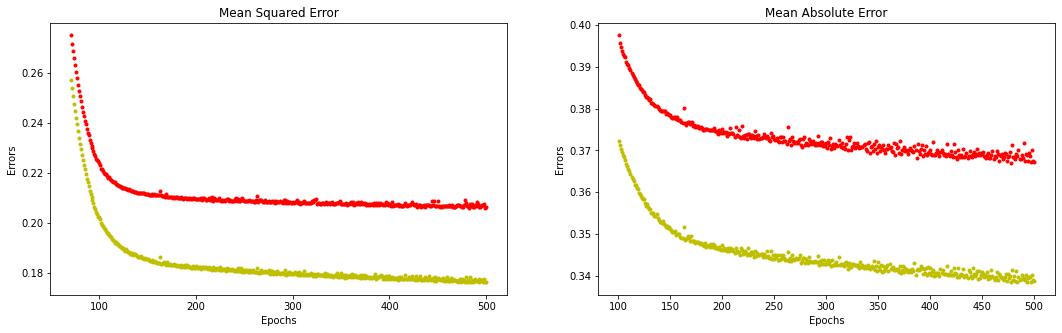

In [35]:

training_loss_mse    = sine_model_1_history.history['loss']
Validation_loss_mse  = sine_model_1_history.history['val_loss']
training_loss_mae    = sine_model_1_history.history['mae']
Validation_loss_mae  = sine_model_1_history.history['val_mae']

number_of_epochs = range(1,len(training_loss_mse) + 1 )


loss_plotter = plt.figure(figsize=(18,5)) 
mse_plot  = loss_plotter.add_subplot(121)
mae_plot  = loss_plotter.add_subplot(122)

mse_plot.plot(number_of_epochs[70:],training_loss_mse[70:] , 'r.')
mse_plot.plot(number_of_epochs[70:],Validation_loss_mse[70:] , 'y.')
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel('Errors')
mse_plot.set_title("Mean Squared Error")


mae_plot.plot(number_of_epochs[100:],training_loss_mae[100:], 'r.')
mae_plot.plot(number_of_epochs[100:],Validation_loss_mae[100:] , 'y.')
mae_plot.set_xlabel("Epochs")
mae_plot.set_ylabel('Errors')
mae_plot.set_title("Mean Absolute Error")

**Analysis** : ToDo for students :)

## New Improved Model
- Increasing Number of Parameters in model
- By increasing Layers

Defining Model Structure

In [36]:
sine_model_improved = tf.keras.Sequential()
sine_model_improved.add(keras.layers.Dense(16,'relu',input_shape=(1,)))
sine_model_improved.add(keras.layers.Dense(16,'relu',input_shape=(1,)))
sine_model_improved.add(keras.layers.Dense(1))

sine_model_improved.compile(optimizer='adam' , loss='mse',metrics=['mae'])
sine_model_improved.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                32        
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


### Training 

In [37]:
sine_model_2_history = sine_model_improved.fit(x_train,y_train,64,500,validation_data=(x_validate,y_validate))

Epoch 1/500
10/10 [==============================] - 1s 19ms/step - loss: 2.0588 - mae: 1.1840 - val_loss: 1.4116 - val_mae: 1.0097
Epoch 2/500
10/10 [==============================] - 0s 6ms/step - loss: 1.1080 - mae: 0.9124 - val_loss: 0.7749 - val_mae: 0.7869
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 0.6590 - mae: 0.7160 - val_loss: 0.5624 - val_mae: 0.6610
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: 0.5503 - mae: 0.6395 - val_loss: 0.5208 - val_mae: 0.6131
Epoch 5/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5302 - mae: 0.6154 - val_loss: 0.5109 - val_mae: 0.5950
Epoch 6/500
10/10 [==============================] - 0s 5ms/step - loss: 0.5186 - mae: 0.6074 - val_loss: 0.4948 - val_mae: 0.5872
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: 0.5006 - mae: 0.5982 - val_loss: 0.4781 - val_mae: 0.5830
Epoch 8/500
10/10 [==============================] - 0s 7ms/step - loss: 0.4839 - 

### Model Comparisons 
- Predictions

Text(0, 0.5, 'Sin Function')

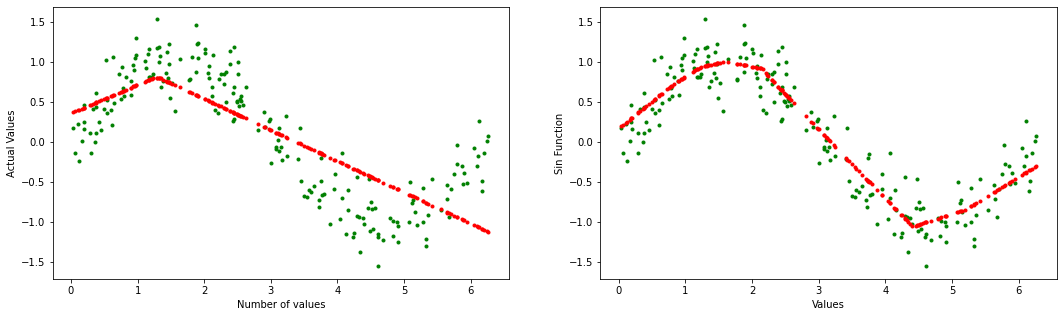

In [39]:
predictions_imporoved = sine_model_improved.predict(x_test)

predictions_plotter = plt.figure(figsize=(18,5)) 
prediction_results_1     = predictions_plotter.add_subplot(121)
prediction_results_2  = predictions_plotter.add_subplot(122)

prediction_results_1.plot(x_test,y_test,'g.')
prediction_results_1.plot(x_test,predictions,'r.')

prediction_results_1.set_xlabel("Number of values")
prediction_results_1.set_ylabel('Actual Values')


prediction_results_2.plot(x_test,y_test,'g.')
prediction_results_2.plot(x_test,predictions_imporoved,'r.')

prediction_results_2.set_xlabel("Values")
prediction_results_2.set_ylabel('Sin Function')

### MSE

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Model 1 MSE')

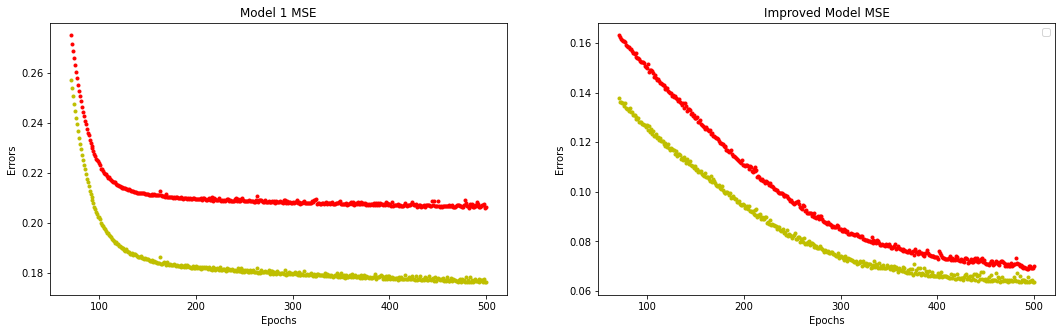

In [42]:

training_loss_mse_1    = sine_model_2_history.history['loss']
Validation_loss_mse_1  = sine_model_2_history.history['val_loss']
training_loss_mae_1    = sine_model_2_history.history['mae']
Validation_loss_mae_1  = sine_model_2_history.history['val_mae']

loss_plotter = plt.figure(figsize=(18,5)) 
mse_plot  = loss_plotter.add_subplot(121)
mse_plot_1  = loss_plotter.add_subplot(122)

mse_plot_1.plot(number_of_epochs[70:],training_loss_mse_1[70:] , 'r.')
mse_plot_1.plot(number_of_epochs[70:],Validation_loss_mse_1[70:] , 'y.')
mse_plot_1.set_xlabel("Epochs")
mse_plot_1.set_ylabel('Errors')
mse_plot_1.set_title("Improved Model MSE")



mse_plot.plot(number_of_epochs[70:],training_loss_mse[70:] , 'r.')
mse_plot.plot(number_of_epochs[70:],Validation_loss_mse[70:] , 'y.')
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel('Errors')
mse_plot.set_title("Model 1 MSE")

### MAE

Text(0.5, 1.0, 'Model 1 MAE')

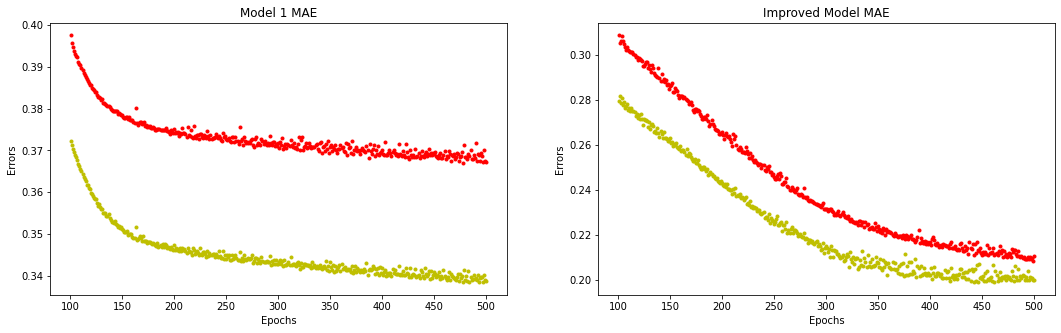

In [43]:
loss_plotter = plt.figure(figsize=(18,5)) 
mae_plot  = loss_plotter.add_subplot(121)
mae_plot_1  = loss_plotter.add_subplot(122)

mae_plot_1.plot(number_of_epochs[100:],training_loss_mae_1[100:], 'r.')
mae_plot_1.plot(number_of_epochs[100:],Validation_loss_mae_1[100:] , 'y.')
mae_plot_1.set_xlabel("Epochs")
mae_plot_1.set_ylabel('Errors')
mae_plot_1.set_title("Improved Model MAE")

mae_plot.plot(number_of_epochs[100:],training_loss_mae[100:], 'r.')
mae_plot.plot(number_of_epochs[100:],Validation_loss_mae[100:] , 'y.')
mae_plot.set_xlabel("Epochs")
mae_plot.set_ylabel('Errors')
mae_plot.set_title("Model 1 MAE")

## Saving The Model and performing Predictions

In [44]:
model_path = '/content/'
keras.models.save_model(sine_model_improved,model_path)

INFO:tensorflow:Assets written to: /content/assets


### Loading model

In [45]:
loaded_model = keras.models.load_model(model_path)

Text(0, 0.5, 'Actual Values')

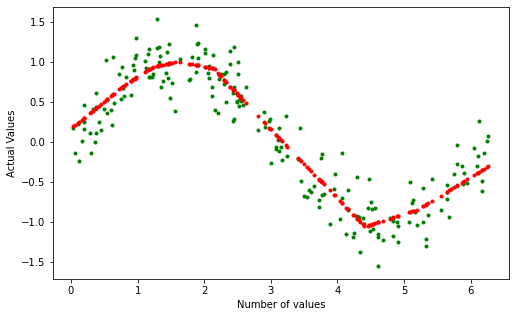

In [51]:
predictions_loaded = loaded_model.predict(x_test)

predictions_plotter = plt.figure(figsize=(18,5)) 
prediction_results_1     = predictions_plotter.add_subplot(121)
# prediction_results_2  = predictions_plotter.add_subplot(122)

prediction_results_1.plot(x_test,y_test,'g.')
prediction_results_1.plot(x_test,predictions_loaded,'r.')

prediction_results_1.set_xlabel("Number of values")
prediction_results_1.set_ylabel('Actual Values')


# prediction_results_2.plot(x_test,y_test,'g.')
# prediction_results_2.plot(x_test,predictions_imporoved,'r.')

# prediction_results_2.set_xlabel("Values")
# prediction_results_2.set_ylabel('Sin Function')